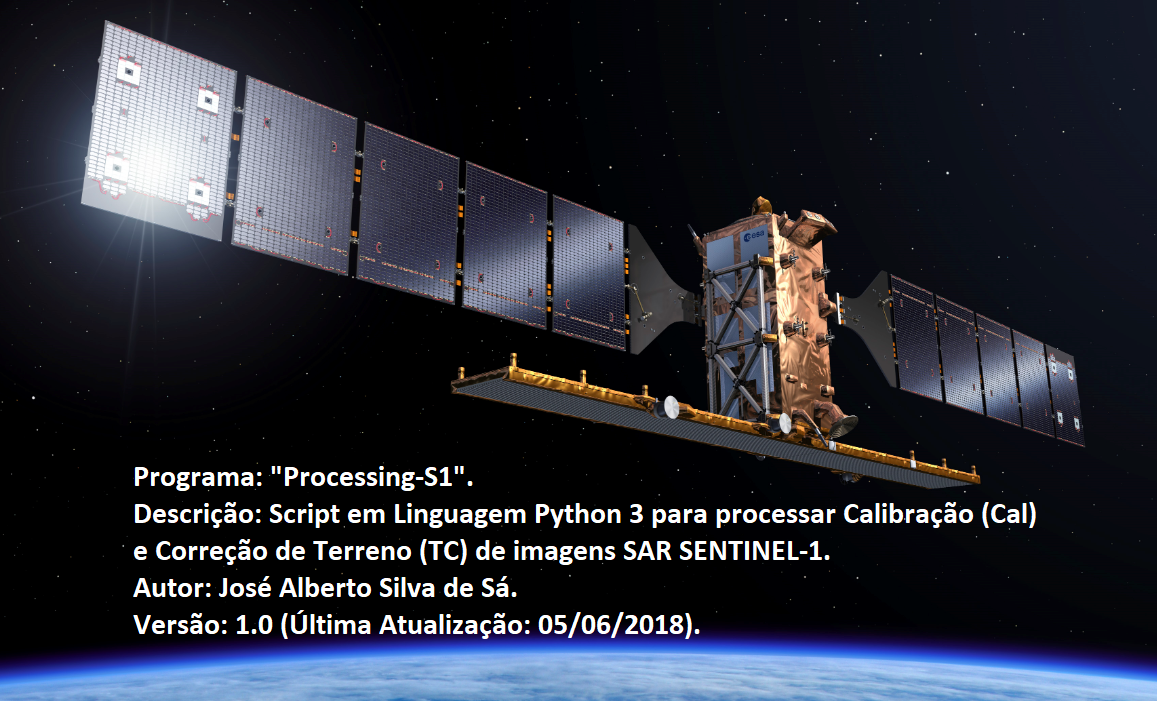

In [1]:
# Importar Pacotes.
import os
import subprocess

In [2]:
# Definir Diretórios de Trabalho.
area_trabalho = "D:\\Dados INPE\\area_trabalho_sentinel1"
area_arquivos_processados = "D:\\Dados INPE\\sentinel1_ser347"

In [3]:
# Obter Arquivos de Entrada.
arquivos_trabalho = os.listdir(area_trabalho)

In [4]:
# Definir o Retângulo Envolvente (Padrão SPRING).
print("Informe as Longitudes / Latitudes do Retângulo Envolvente (Padrão SPRING):")
# Exemplo de Teste: Belém - Pará
long_1 = input("Long. 1:") # Long 1 = -48.5
lat_1 = input("Lat. 1:") # Lat 1 = -1.5
long_2 = input("Long. 2:") # Long 2 = -48.4
lat_2 = input("Lat. 2:") # Lat 2 = -1.4

Informe as Longitudes / Latitudes do Retângulo Envolvente (Padrão SPRING):
Long. 1:-48.5
Lat. 1:-1.5
Long. 2:-48.4
Lat. 2:-1.4


In [5]:
# Pontos do Retângulo Envolvente.
P1_long = long_1
P1_lat = lat_1
P2_long = long_2
P2_lat = lat_1
P3_long = long_2
P3_lat = lat_2
P4_long = long_1
P4_lat = lat_2
P5_long = long_1
P5_lat = lat_1

In [6]:
# Verificação e Processamento dos Arquivos Válidos.

print("Somente serão processados os Arquivos Válidos")
print()
print("Os Arquivos Não Válidos serão apenas listados")
print()
print("Por favor, aguarde a finalização do Processamento...")
print()

for aa in arquivos_trabalho:
    if os.path.isfile(area_trabalho + "\\" + aa):
        arquivo_1 = os.path.splitext(aa)[0]
        arquivo_2 = area_trabalho + "\\" +aa

        # Criação do Subset.
        arquivo_3 = area_arquivos_processados + "\\" + "subset_of_" + arquivo_1
        subprocess.call([
            "gpt", "Subset", "-Ssource=" + arquivo_2,
            "-PgeoRegion=POLYGON((" + P1_long + " " + P1_lat + "," + P2_long + " " + P2_lat + "," + P3_long + " " + P3_lat + "," + P4_long + " " + P4_lat + "," + P5_long + " " + P5_lat + "))",
            "-PcopyMetadata=true", "-t", arquivo_3 + ".dim"
        ])

        # Calibração do Subset.
        arquivo_4 = area_arquivos_processados + "\\" + "subset_of_" + arquivo_1 + "_Cal.dim"
        subprocess.call([
            "gpt", "Calibration", arquivo_3 + ".dim", "-t", arquivo_4
        ])

        # Correção de Terreno do Subset.
        arquivo_5 = area_arquivos_processados + "\\" + "subset_of_" + arquivo_1 + "_Cal_TC.dim"
        subprocess.call([
            "gpt", "Terrain-Correction", arquivo_4, "-t", arquivo_5
        ])

    else:
        print("O elemento '"+ aa +"' contido na área de trabalho não é um Arquivo Válido.")
        print()
        
print ("Processamento finalizado para os Arquivos Válidos!")

Somente serão processados os Arquivos Válidos

Os Arquivos Não Válidos serão apenas listados

Por favor, aguarde a finalização do Processamento...

O elemento 'outros' contido na área de trabalho não é um Arquivo Válido.

Processamento finalizado para os Arquivos Válidos!
